### PROJECT(1) 손글씨 분류

In [74]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

#### 01. 데이터 불러오기

In [75]:
digits = load_digits()

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

#### 02. 데이터 확인

In [76]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [77]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

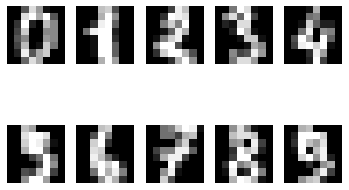

In [78]:
%matplotlib inline

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [79]:
df_digits = pd.DataFrame(digits.data, columns = digits.feature_names)
df_digits["label"]= digits.target

In [80]:
df_digits.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [81]:
df_digits.groupby("label").size()

label
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
dtype: int64

Label 각각의 분표는 비슷함을 확인할 수 있다.

#### 03. 데이터 분리

In [82]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 45)

#### 04. Model 학습
    1) Decision Tree

In [83]:
DT_model = DecisionTreeClassifier()

DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
y_pred = DT_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.82      0.74      0.78        38
           2       0.84      0.77      0.80        47
           3       0.89      0.78      0.83        51
           4       0.91      0.77      0.84        53
           5       0.79      0.85      0.81        39
           6       0.91      0.91      0.91        44
           7       0.70      0.98      0.81        47
           8       0.81      0.77      0.79        39
           9       0.77      0.79      0.78        52

    accuracy                           0.83       450
   macro avg       0.84      0.83      0.83       450
weighted avg       0.84      0.83      0.83       450



    2) Random Forest

In [85]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       1.00      1.00      1.00        38
           2       1.00      0.98      0.99        47
           3       1.00      0.96      0.98        51
           4       0.98      0.96      0.97        53
           5       1.00      0.95      0.97        39
           6       1.00      1.00      1.00        44
           7       0.81      0.98      0.88        47
           8       0.91      1.00      0.95        39
           9       0.95      0.81      0.88        52

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



    3) SVM

In [87]:
SVM_model = SVC()
SVM_model.fit(X_train, y_train)

SVC()

In [88]:
y_pred = SVM_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        51
           4       1.00      0.98      0.99        53
           5       1.00      0.95      0.97        39
           6       1.00      1.00      1.00        44
           7       0.92      0.98      0.95        47
           8       0.91      1.00      0.95        39
           9       0.94      0.87      0.90        52

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



    4) SGD Classifier

In [89]:
SGDC_model = SGDClassifier()
SGDC_model.fit(X_train, y_train)

SGDClassifier()

In [90]:
y_pred = SGDC_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.90      0.97      0.94        38
           2       0.98      1.00      0.99        47
           3       0.92      0.96      0.94        51
           4       0.96      1.00      0.98        53
           5       0.92      0.90      0.91        39
           6       1.00      1.00      1.00        44
           7       1.00      0.96      0.98        47
           8       0.91      0.74      0.82        39
           9       0.87      0.92      0.90        52

    accuracy                           0.95       450
   macro avg       0.95      0.94      0.94       450
weighted avg       0.95      0.95      0.95       450



In [91]:
Logi_model = LogisticRegression()
Logi_model.fit(X_train, y_train)

/home/benestump/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [92]:
y_pred = Logi_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       1.00      0.97      0.99        38
           2       0.94      1.00      0.97        47
           3       1.00      0.98      0.99        51
           4       0.98      0.96      0.97        53
           5       0.97      0.90      0.93        39
           6       1.00      1.00      1.00        44
           7       0.94      0.96      0.95        47
           8       0.88      0.95      0.91        39
           9       0.92      0.90      0.91        52

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



**svm모델의 성능이 가장 뛰어남을 확인할 수 있었다.**

#### 05. Model 평가

- 각 분류별 데이터의 분포가 비슷하고 precision과 recall이 비슷하게 높은 것을 볼때 각 모델의 accuracy를 평가 지표로 생각하는 것도 적절할 것이라고 판단하여 SVM이 가장 뛰어난 모델이라고 생각한다 